In [15]:
from utils import load_data, convert_to_single_label
import config as cfg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [2]:
users = load_data(format='pandas')
features = load_data(cfg.USER_FEATURES_FILE, format='pandas')
relations = load_data(cfg.USER_RELATIONS_FILE, format='pandas')
labels = load_data(cfg.USER_LABELS_FILE, format='pandas')

users = users.set_index('login')
features = features.set_index('username')
labels = labels.set_index('login')

In [3]:
labels = labels.apply(convert_to_single_label, axis=1)
labels = labels.idxmax(axis=1)

In [4]:
features

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,topics_algorithm,topics_plugin,topics_vercel,topics_music,topics_vue3,topics_security,topics_cryptocurrency,topics_data,topics_rails,topics_twitter
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0,0,0,0,0,0,0,0,0,0
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0,0,0,0,0,0,0,0,0,0
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0,0,0,0,0,0,0,0,0,0
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0,0,0,0,0,0,0,0,0,0
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0,0,0,0,0,0,0,0,0,0
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,topics_algorithm,topics_plugin,topics_vercel,topics_music,topics_vue3,topics_security,topics_cryptocurrency,topics_data,topics_rails,topics_twitter
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0,0,0,0,0,0,0,0,0,0
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0,0,0,0,0,0,0,0,0,0
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0,0,0,0,0,0,0,0,0,0
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0,0,0,0,0,0,0,0,0,0
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0,0,0,0,0,0,0,0,0,0
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
relations_subset = relations[relations.following.isin(labels.index) & relations.follow.isin(labels.index)]

In [7]:
lang_cols = [col for col in features.columns if 'languages' in col]
topic_cols = [col for col in features.columns if 'topics' in col] 

In [8]:
features[(features[topic_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,topics_algorithm,topics_plugin,topics_vercel,topics_music,topics_vue3,topics_security,topics_cryptocurrency,topics_data,topics_rails,topics_twitter
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.0,0.0,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.0,0.0,0.000,0.014,...,0,0,0,0,0,0,0,0,0,0
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.0,0.0,0.019,0.001,...,0,0,0,0,0,0,0,0,0,0
scazan,0.168,0.000,0.107,0.042,0.000,0.000,0.0,0.0,0.079,0.000,...,0,0,0,0,0,0,0,0,0,0
dantehemerson,0.408,0.000,0.571,0.000,0.000,0.000,0.0,0.0,0.006,0.008,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
emersonjsouza,0.379,0.250,0.096,0.000,0.234,0.000,0.0,0.0,0.000,0.037,...,0,0,0,0,0,0,0,0,0,0
ShayBox,0.000,0.250,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
hsk81,0.200,0.116,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.482,...,0,0,0,0,0,0,0,0,0,0


In [9]:
features[(features[lang_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,topics_algorithm,topics_plugin,topics_vercel,topics_music,topics_vue3,topics_security,topics_cryptocurrency,topics_data,topics_rails,topics_twitter
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0,0,0,0,0,0,0,0,0,0
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0,0,0,0,0,0,0,0,0,0
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0,0,0,0,0,0,0,0,0,0
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0,0,0,0,0,0,0,0,0,0
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0,0,0,0,0,0,0,0,0,0
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

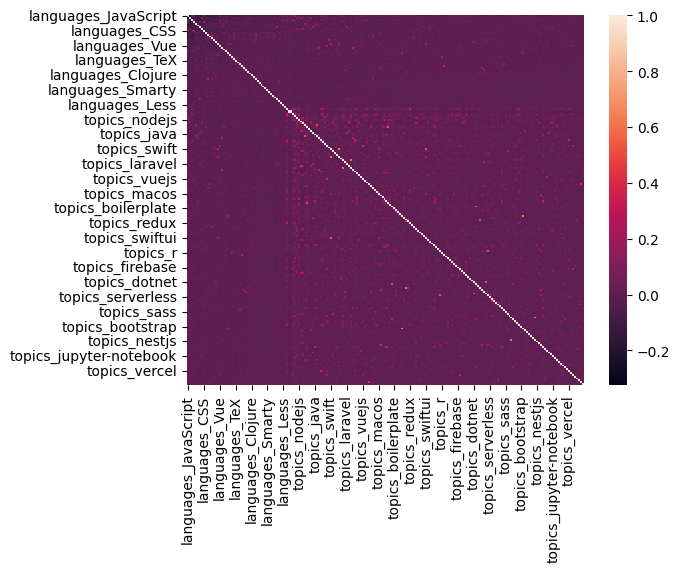

In [10]:
sns.heatmap(features.corr())

In [13]:
features[(features[lang_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,topics_algorithm,topics_plugin,topics_vercel,topics_music,topics_vue3,topics_security,topics_cryptocurrency,topics_data,topics_rails,topics_twitter
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0,0,0,0,0,0,0,0,0,0
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0,0,0,0,0,0,0,0,0,0
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0,0,0,0,0,0,0,0,0,0
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0,0,0,0,0,0,0,0,0,0
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0,0,0,0,0,0,0,0,0,0
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0,0,0,0,0,0,0,0,0,0


In [40]:
vt = VarianceThreshold(threshold=1e-3)

In [41]:
features_selected = vt.fit_transform(features)
len(vt.get_feature_names_out()), vt.get_feature_names_out()

(161,
 array(['languages_JavaScript', 'languages_Python', 'languages_TypeScript',
        'languages_HTML', 'languages_Go', 'languages_Java',
        'languages_PHP', 'languages_Jupyter Notebook', 'languages_CSS',
        'languages_Shell', 'languages_C++', 'languages_Ruby',
        'languages_C', 'languages_Rust', 'languages_C#', 'languages_Swift',
        'languages_Vue', 'languages_Kotlin', 'languages_Dockerfile',
        'languages_Dart', 'languages_Objective-C', 'languages_R',
        'languages_TeX', 'languages_Lua', 'languages_Elixir',
        'languages_Scala', 'languages_Vim Script', 'languages_HCL',
        'topics_react', 'topics_config', 'topics_github-config',
        'topics_typescript', 'topics_javascript', 'topics_python',
        'topics_nodejs', 'topics_deep-learning', 'topics_machine-learning',
        'topics_golang', 'topics_docker', 'topics_hacktoberfest',
        'topics_pytorch', 'topics_php', 'topics_java', 'topics_go',
        'topics_android', 'topics_nextjs'

In [21]:
features_selected.shape

(35909, 2)